# **Preparing the environment**

In [1]:
!pip install roboflow ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 132.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.

# **Download the Dataset from Roboflow**

In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GdFgVFgFTIM62fgIdlKi")
project = rf.workspace("material-identification").project("garbage-classification-3")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to GARBAGE-CLASSIFICATION-3-2 in yolov8:: 100%|██████████| 20940/20940 [00:01<00:00, 10648.28it/s]


In [14]:
print("YAML config path:", dataset.location + "/data.yaml")

YAML config path: /content/GARBAGE-CLASSIFICATION-3-2/data.yaml


## **YOLOv8 Training**

In [4]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=32,
    name="trash-detection"
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 358MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/GARBAGE-CLASSIFICATION-3-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=trash-detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,137,922 parameters, 11,137,906 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 359MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 549.3±255.5 MB/s, size: 15.2 KB)


train: Scanning /content/GARBAGE-CLASSIFICATION-3-2/train/labels... 7324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7324/7324 [00:04<00:00, 1491.42it/s]


train: New cache created: /content/GARBAGE-CLASSIFICATION-3-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 386.1±115.4 MB/s, size: 15.5 KB)


val: Scanning /content/GARBAGE-CLASSIFICATION-3-2/valid/labels... 2098 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2098/2098 [00:01<00:00, 1096.10it/s]

val: New cache created: /content/GARBAGE-CLASSIFICATION-3-2/valid/labels.cache


Plotting labels to runs/detect/trash-detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/trash-detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.4G      1.435      2.153      1.492        206        640: 100%|██████████| 229/229 [01:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  1.98it/s]


                   all       2098      18916      0.346      0.272      0.261      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        12G      1.446      1.741      1.524        293        640: 100%|██████████| 229/229 [01:21<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  2.00it/s]


                   all       2098      18916      0.361      0.288      0.283      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      16.8G      1.438      1.707      1.515        318        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  2.02it/s]


                   all       2098      18916      0.343      0.329      0.285      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.6G      1.439      1.661       1.52        317        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  2.06it/s]


                   all       2098      18916      0.334      0.301      0.277      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G      1.406       1.58        1.5        265        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  2.06it/s]


                   all       2098      18916      0.294      0.273       0.25      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.7G       1.37      1.538      1.474        326        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.11it/s]


                   all       2098      18916      0.485      0.335      0.366      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.1G      1.353       1.47      1.456        184        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.13it/s]


                   all       2098      18916      0.483      0.383      0.409      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.5G       1.32      1.444       1.45        452        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.08it/s]


                   all       2098      18916      0.446      0.374      0.377      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      14.6G      1.317      1.415      1.437        327        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  2.04it/s]


                   all       2098      18916       0.49      0.385      0.408      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        10G      1.295      1.365      1.427        392        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.13it/s]

                   all       2098      18916      0.493      0.372      0.415      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.6G      1.285      1.314      1.407        378        640: 100%|██████████| 229/229 [01:21<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.11it/s]


                   all       2098      18916      0.529      0.394       0.44       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.6G      1.282        1.3      1.409        256        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.12it/s]


                   all       2098      18916      0.531      0.394       0.45      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.2G       1.27      1.254      1.405        277        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.13it/s]

                   all       2098      18916      0.528      0.386      0.435      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.4G      1.257      1.234      1.387        268        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.08it/s]


                   all       2098      18916      0.543       0.41      0.457      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.8G      1.232      1.237      1.382        370        640: 100%|██████████| 229/229 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.10it/s]


                   all       2098      18916      0.504      0.408       0.43      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.09G      1.235      1.209      1.374        571        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.16it/s]

                   all       2098      18916       0.56      0.394      0.458      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.4G      1.243      1.187      1.375        534        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.15it/s]

                   all       2098      18916       0.57        0.4      0.475      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.9G      1.241      1.174      1.371        281        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.15it/s]

                   all       2098      18916      0.536      0.417      0.481      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.8G      1.221      1.142      1.354        197        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.13it/s]

                   all       2098      18916       0.53      0.409       0.45      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.1G      1.199      1.107      1.347        252        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.13it/s]

                   all       2098      18916      0.526      0.418      0.466      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.1G      1.191      1.098      1.342        395        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.15it/s]

                   all       2098      18916      0.562      0.437      0.501      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.5G      1.198      1.102      1.348        447        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.17it/s]

                   all       2098      18916      0.549      0.456      0.506      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.9G      1.189      1.082      1.338        341        640: 100%|██████████| 229/229 [01:21<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.16it/s]

                   all       2098      18916      0.585      0.433      0.509      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.1G      1.166      1.063      1.331        241        640: 100%|██████████| 229/229 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.16it/s]

                   all       2098      18916      0.569      0.458      0.513      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.6G      1.164       1.06      1.325        286        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.17it/s]

                   all       2098      18916      0.537      0.466      0.508      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.3G      1.197      1.037       1.33        295        640: 100%|██████████| 229/229 [01:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.17it/s]

                   all       2098      18916      0.588      0.461       0.53       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        11G      1.152      1.018      1.312        198        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.19it/s]

                   all       2098      18916      0.577      0.444      0.489      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.5G      1.169      1.013      1.314        896        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.18it/s]

                   all       2098      18916      0.604      0.445      0.514      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.6G      1.155     0.9954      1.305        226        640: 100%|██████████| 229/229 [01:21<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.18it/s]

                   all       2098      18916      0.587      0.472      0.524      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.3G       1.15      0.982      1.303        281        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.19it/s]

                   all       2098      18916      0.573      0.459      0.518      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.7G      1.132     0.9784      1.294        185        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.18it/s]

                   all       2098      18916      0.581      0.471      0.525      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.3G      1.143      0.962      1.297        364        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.18it/s]

                   all       2098      18916       0.56      0.501      0.527       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.5G      1.111     0.9451      1.287        270        640: 100%|██████████| 229/229 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.19it/s]

                   all       2098      18916      0.601      0.475       0.54      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.3G      1.114     0.9207       1.28        196        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.19it/s]

                   all       2098      18916      0.571      0.503       0.53      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.9G        1.1     0.9193      1.274        290        640: 100%|██████████| 229/229 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.19it/s]

                   all       2098      18916      0.616      0.472      0.534      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.2G      1.112     0.9072      1.269        286        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.20it/s]

                   all       2098      18916      0.588      0.476      0.531      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.2G      1.089     0.8999      1.266        575        640: 100%|██████████| 229/229 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.20it/s]

                   all       2098      18916      0.608      0.467      0.535      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.2G       1.11     0.9003      1.271        333        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.20it/s]

                   all       2098      18916      0.626      0.461      0.541      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.3G       1.09      0.871      1.257        247        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.21it/s]

                   all       2098      18916      0.611      0.479      0.544      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        11G      1.067     0.8617      1.251        228        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.21it/s]

                   all       2098      18916      0.621      0.484      0.554       0.38


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.6G      1.135     0.8583      1.288        130        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.21it/s]

                   all       2098      18916      0.581      0.503       0.55       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.9G      1.099     0.8194      1.271        191        640: 100%|██████████| 229/229 [01:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.21it/s]

                   all       2098      18916       0.61       0.48      0.547      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.36G      1.107     0.8132      1.273        148        640: 100%|██████████| 229/229 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.21it/s]

                   all       2098      18916      0.574      0.502      0.545      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.2G      1.079     0.7884       1.26        345        640: 100%|██████████| 229/229 [01:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.22it/s]

                   all       2098      18916      0.576      0.525       0.55      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.8G       1.08     0.7811      1.258        175        640: 100%|██████████| 229/229 [01:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.21it/s]

                   all       2098      18916      0.607      0.486      0.549      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.9G       1.06     0.7614      1.244         73        640: 100%|██████████| 229/229 [01:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.21it/s]

                   all       2098      18916      0.614      0.504      0.558      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.3G      1.055       0.75      1.242        200        640: 100%|██████████| 229/229 [01:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.22it/s]

                   all       2098      18916      0.623      0.488      0.559      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        15G      1.056     0.7379      1.233         64        640: 100%|██████████| 229/229 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.22it/s]

                   all       2098      18916      0.588      0.517      0.557      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      14.1G      1.042     0.7297      1.228        230        640: 100%|██████████| 229/229 [01:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.22it/s]

                   all       2098      18916      0.605      0.497      0.557      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.1G      1.039     0.7198      1.223        295        640: 100%|██████████| 229/229 [01:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.21it/s]

                   all       2098      18916      0.621      0.493      0.559      0.389



50 epochs completed in 1.353 hours.
Optimizer stripped from runs/detect/trash-detection/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/trash-detection/weights/best.pt, 22.5MB

Validating runs/detect/trash-detection/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  2.03it/s]


                   all       2098      18916      0.621      0.493      0.559      0.389
         BIODEGRADABLE        676      13637      0.815      0.492      0.639      0.366
             CARDBOARD        438       1292      0.747      0.539      0.638      0.482
                 GLASS        805       2380      0.885      0.705      0.819      0.619
                 METAL        398       1360      0.793      0.624      0.719      0.496
                 PAPER         15         33      0.039     0.0606      0.077     0.0698
               PLASTIC         91        214      0.449       0.54      0.461      0.302
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/trash-detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2a917e61d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# **Save the model's best.py**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!cp /content/runs/detect/trash-detection/weights/best.pt /content/drive/MyDrive/trash-detector-best.pt

In [8]:
!ls /content/runs/


detect


In [9]:
!ls /content/runs/train/


ls: cannot access '/content/runs/train/': No such file or directory


# **For reusing the model**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/trash-detector-best.pt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!ls -lh /content/drive/MyDrive/trash-detector-best.pt

-rw------- 1 root root 22M Jul 29 08:39 /content/drive/MyDrive/trash-detector-best.pt


In [17]:
model.predict(
    source="/content/GARBAGE-CLASSIFICATION-3-2/test/images/metal1005_jpg.rf.d736ab336e8fa92ce57727666e624259.jpg",
    conf=0.4,
    save=True
)


image 1/1 /content/GARBAGE-CLASSIFICATION-3-2/test/images/metal1005_jpg.rf.d736ab336e8fa92ce57727666e624259.jpg: 640x640 1 METAL, 9.0ms
Speed: 8.1ms preprocess, 9.0ms inference, 297.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'BIODEGRADABLE', 1: 'CARDBOARD', 2: 'GLASS', 3: 'METAL', 4: 'PAPER', 5: 'PLASTIC'}
 obb: None
 orig_img: array([[[188, 202, 255],
         [188, 202, 255],
         [188, 202, 255],
         ...,
         [148, 180, 251],
         [146, 178, 249],
         [145, 177, 248]],
 
        [[188, 202, 255],
         [188, 202, 255],
         [188, 202, 255],
         ...,
         [147, 179, 250],
         [147, 179, 250],
         [146, 178, 249]],
 
        [[188, 202, 255],
         [188, 202, 255],
         [188, 202, 255],
         ...,
         [148, 178, 249],
         [147, 179, 250],
         [147, 179, 250]],
 
        ...,
 
        [[201, 190, 186],
         [200, 189, 185],
         [200, 189, 185],
         ...,
         [140, 137, 133],
         [140, 137, 133],
         [140, 137, 133]],
 
        [[201, 190, 186],
         [2

In [18]:
!ls -lh /content/GARBAGE-CLASSIFICATION-3-2/test/images/


total 21M
-rw-r--r-- 1 root root 9.7K Jul 29 10:50 metal1000_jpg.rf.f972491130c59d3bff7e97b22e8e2980.jpg
-rw-r--r-- 1 root root  12K Jul 29 10:50 metal1005_jpg.rf.d736ab336e8fa92ce57727666e624259.jpg
-rw-r--r-- 1 root root  12K Jul 29 10:50 metal100_jpg.rf.8605f3d87c15f6f37575fa2907d5bc6c.jpg
-rw-r--r-- 1 root root  32K Jul 29 10:50 metal1014_jpeg.rf.7c66a5a281d17fde9891d5777c496391.jpg
-rw-r--r-- 1 root root  12K Jul 29 10:50 metal1016_jpg.rf.e9045ffa8d93980005dca0adcce9f187.jpg
-rw-r--r-- 1 root root  12K Jul 29 10:50 metal1017_jpg.rf.52c6bf2e21ee24727bd9c29fc7955f22.jpg
-rw-r--r-- 1 root root  12K Jul 29 10:50 metal1021_jpg.rf.4cb79a4ecc66f08444b6493a7480ae9a.jpg
-rw-r--r-- 1 root root  17K Jul 29 10:50 metal1027_jpg.rf.97c4cd6662c7366606b0f2a96d2245b0.jpg
-rw-r--r-- 1 root root  23K Jul 29 10:50 metal1028_jpg.rf.bcd1921de5b9a4df22bbcce4e32344b6.jpg
-rw-r--r-- 1 root root 9.4K Jul 29 10:50 metal1032_jpg.rf.d0991459cb992a92cf44e9dd2b8cf608.jpg
-rw-r--r-- 1 root root  12K Jul 29 10:50

In [19]:
results = model.predict(
    source="/content/GARBAGE-CLASSIFICATION-3-2/test/images/metal1005_jpg.rf.d736ab336e8fa92ce57727666e624259.jpg",
    conf=0.4,
    save=True
)

r = results[0]

for box in r.boxes:
    cls_id = int(box.cls[0])
    class_name = r.names[cls_id]
    conf_score = float(box.conf[0])
    print(f"Prediction: {class_name} ({conf_score:.2f})")



image 1/1 /content/GARBAGE-CLASSIFICATION-3-2/test/images/metal1005_jpg.rf.d736ab336e8fa92ce57727666e624259.jpg: 640x640 1 METAL, 9.7ms
Speed: 5.2ms preprocess, 9.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Prediction: METAL (0.92)


# **Tahmin edilen sınıfı gösterme**

In [32]:
model.predict(
    source="/content/GARBAGE-CLASSIFICATION-3-2/test/images",
    conf=0.4,
    save=True
)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1042 /content/GARBAGE-CLASSIFICATION-3-2/test/images/metal1000_jpg.rf.f972491130c59d3bff7e97b22e8e2980.jpg: 640x640 1 CARDBOARD, 1 METAL, 10.1ms
image 2/1042 /content/GARBAGE-CLASSIFICATION-3-2/test/images/metal1005_jpg.rf.d736ab336e8fa92ce57727666e624259.jpg: 640x640 1 METAL, 7.6ms
image 3/1042 /content/GARBAGE-CLASSIFICATION-3-2/test/images/metal100_jpg.rf.8605f3d87c15f6f37575fa2907d5bc6c.jpg: 640x640 2 METALs, 7.4ms
image 4/1042 /content/GAR

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'BIODEGRADABLE', 1: 'CARDBOARD', 2: 'GLASS', 3: 'METAL', 4: 'PAPER', 5: 'PLASTIC'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [2

In [45]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)


100%|██████████| 755k/755k [00:00<00:00, 88.0MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 917.6±531.7 MB/s, size: 23.9 KB)



val: Scanning /content/GARBAGE-CLASSIFICATION-3-2/valid/labels... 2098 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2098/2098 [00:01<00:00, 1469.16it/s]

val: New cache created: /content/GARBAGE-CLASSIFICATION-3-2/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 132/132 [00:20<00:00,  6.52it/s]


                   all       2098      18916       0.62      0.493      0.559      0.389
         BIODEGRADABLE        676      13637      0.815      0.492      0.638      0.366
             CARDBOARD        438       1292      0.747      0.538      0.638      0.482
                 GLASS        805       2380      0.884      0.705      0.819      0.619
                 METAL        398       1360      0.792      0.623       0.72      0.495
                 PAPER         15         33      0.039     0.0606      0.077     0.0699
               PLASTIC         91        214      0.446      0.537      0.462      0.302
Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa2d43597d0>
curves: ['Precision-Recall

# **Some Examples**

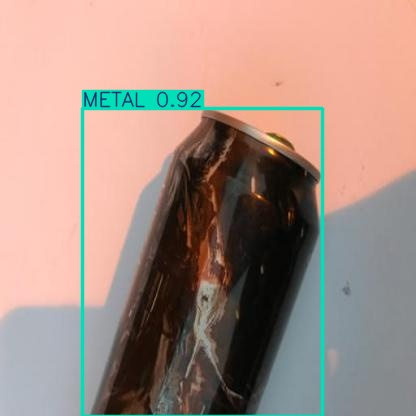

In [36]:
from PIL import Image
import IPython.display as display

image_path = "/content/runs/detect/predict/metal1005_jpg.rf.d736ab336e8fa92ce57727666e624259.jpg"

display.display(Image.open(image_path))


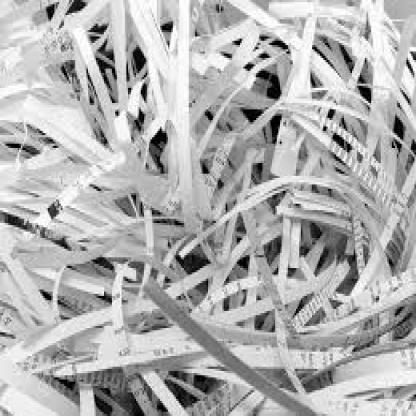


image 1/1 /content/GARBAGE-CLASSIFICATION-3-2/test/images/paper1310_jpg.rf.e1c86c5684432a2428eee4932b574e68.jpg: 640x640 1 PAPER, 12.0ms
Speed: 3.9ms preprocess, 12.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Prediction: PAPER (0.98)


In [37]:
from PIL import Image
import IPython.display as display

image_path = "/content/GARBAGE-CLASSIFICATION-3-2/test/images/paper1310_jpg.rf.e1c86c5684432a2428eee4932b574e68.jpg"
display.display(Image.open(image_path))

results = model.predict(
    source=image_path,
    conf=0.4,
    save=True
)

r = results[0]

for box in r.boxes:
    cls_id = int(box.cls[0])
    class_name = r.names[cls_id]
    conf_score = float(box.conf[0])
    print(f"Prediction: {class_name} ({conf_score:.2f})")



image 1/1 /content/runs/detect/predict/paper2047_jpg.rf.e14156685f098d49eee45a61960b6469.jpg: 640x640 1 PAPER, 9.4ms
Speed: 4.0ms preprocess, 9.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


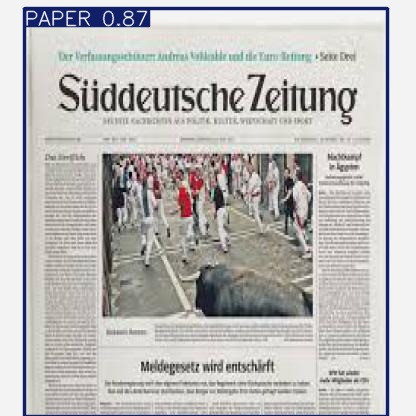

**Image:** `paper2047_jpg.rf.e14156685f098d49eee45a61960b6469.jpg`
Prediction: **PAPER** (0.92)


image 1/1 /content/runs/detect/predict/metal1000_jpg.rf.f972491130c59d3bff7e97b22e8e2980.jpg: 640x640 1 METAL, 8.1ms
Speed: 2.9ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


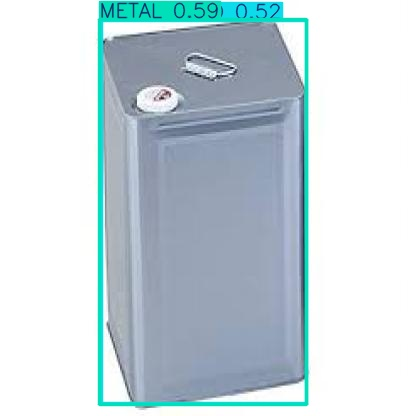

**Image:** `metal1000_jpg.rf.f972491130c59d3bff7e97b22e8e2980.jpg`
Prediction: **METAL** (0.64)


image 1/1 /content/runs/detect/predict/plastic666_jpg.rf.541119ae38c912492bedcdac172c56af.jpg: 640x640 1 PLASTIC, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


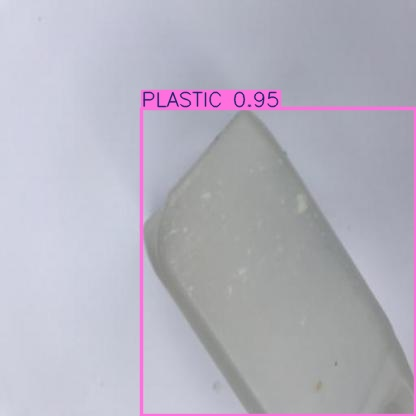

**Image:** `plastic666_jpg.rf.541119ae38c912492bedcdac172c56af.jpg`
Prediction: **PLASTIC** (0.95)


image 1/1 /content/runs/detect/predict/paper254_jpg.rf.76049f1b811916c75a597d6a4d3edb05.jpg: 640x640 1 PAPER, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


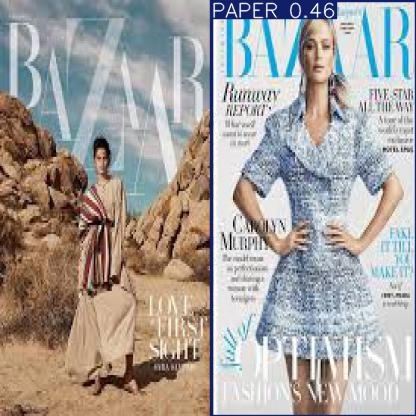

**Image:** `paper254_jpg.rf.76049f1b811916c75a597d6a4d3edb05.jpg`
Prediction: **PAPER** (0.44)


image 1/1 /content/runs/detect/predict/plastic68_jpg.rf.322d01d9b1cd2c714e6fcf1abd54e2e0.jpg: 640x640 1 PAPER, 1 PLASTIC, 8.4ms
Speed: 2.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


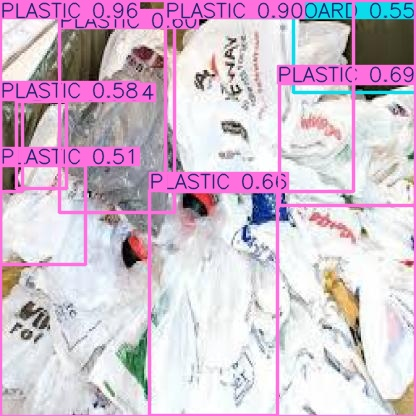

**Image:** `plastic68_jpg.rf.322d01d9b1cd2c714e6fcf1abd54e2e0.jpg`
Prediction: **PAPER** (0.75)
Prediction: **PLASTIC** (0.59)

In [40]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display, Markdown
import os

predict_folder = "/content/runs/detect/predict"

selected_files = os.listdir(predict_folder)[:5]
for img_file in selected_files:
    if not img_file.endswith((".jpg", ".png")):
        continue

    img_path = os.path.join(predict_folder, img_file)

    result = model.predict(source=img_path, conf=0.4, save=False)[0]
    display(Image.open(img_path))

    lines = [f"**Image:** `{img_file}`"]
    for box in result.boxes:
        cls_id = int(box.cls[0])
        class_name = result.names[cls_id]
        conf = float(box.conf[0])
        lines.append(f"Prediction: **{class_name.upper()}** ({conf:.2f})")

    display(Markdown("\n".join(lines)))



image 1/1 /content/runs/detect/predict/paper2047_jpg.rf.e14156685f098d49eee45a61960b6469.jpg: 640x640 1 PAPER, 8.2ms
Speed: 2.8ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/runs/detect/predict/metal1000_jpg.rf.f972491130c59d3bff7e97b22e8e2980.jpg: 640x640 1 METAL, 7.5ms
Speed: 2.6ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/runs/detect/predict/plastic666_jpg.rf.541119ae38c912492bedcdac172c56af.jpg: 640x640 1 PLASTIC, 7.5ms
Speed: 2.5ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/runs/detect/predict/paper254_jpg.rf.76049f1b811916c75a597d6a4d3edb05.jpg: 640x640 1 PAPER, 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/runs/detect/predict/plastic68_jpg.rf.322d01d9b1cd2c714e6fcf1abd54e2e0.jpg: 640x640 1 PAPER, 1 PLASTIC, 7.6ms
Speed: 2.5m


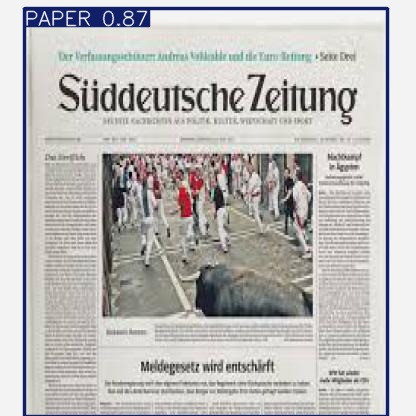
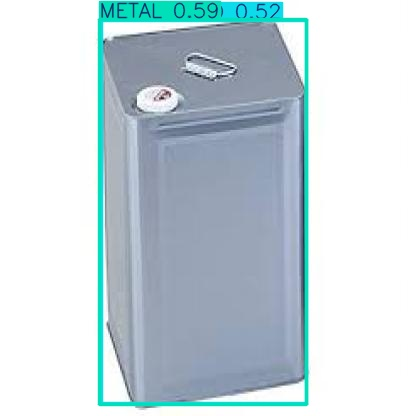
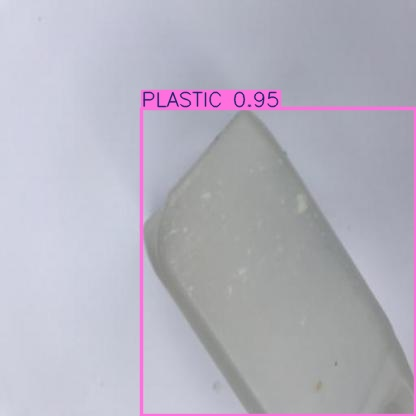
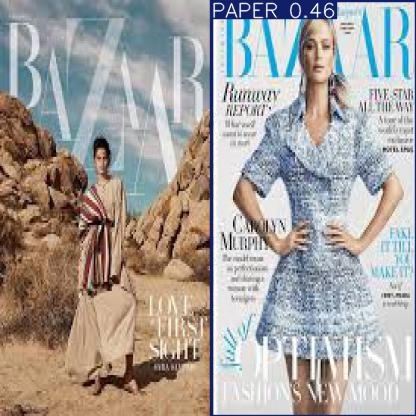
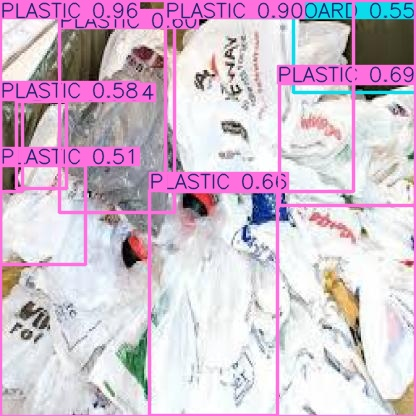
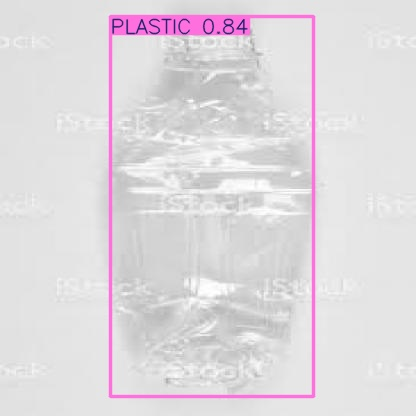
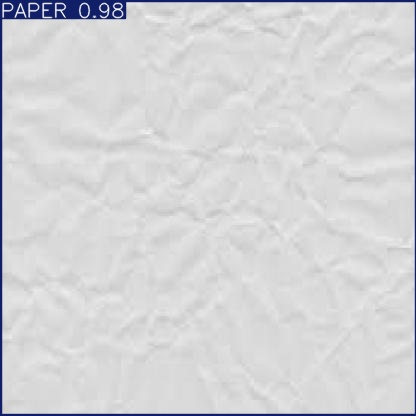
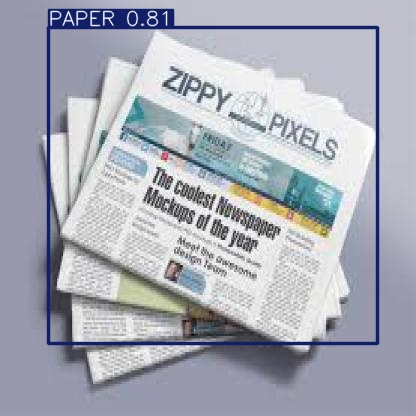
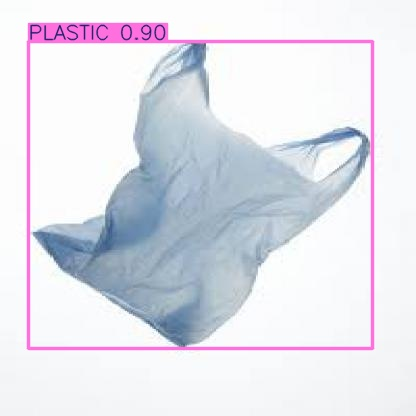
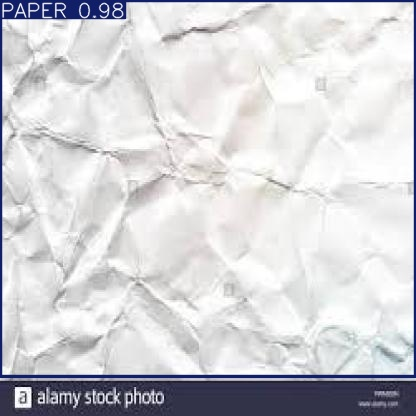
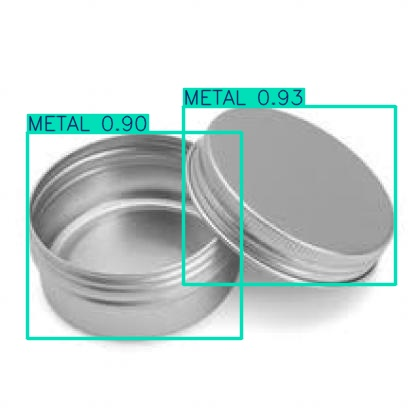
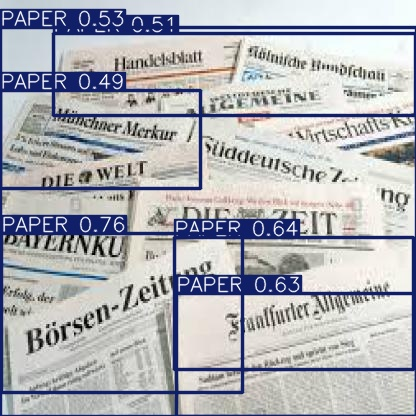
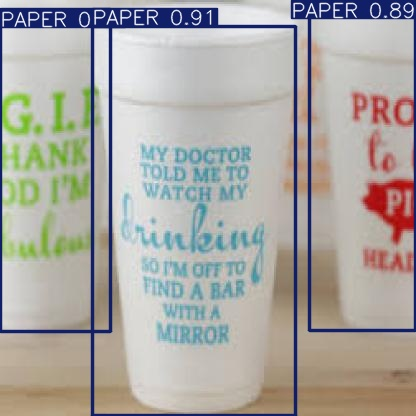
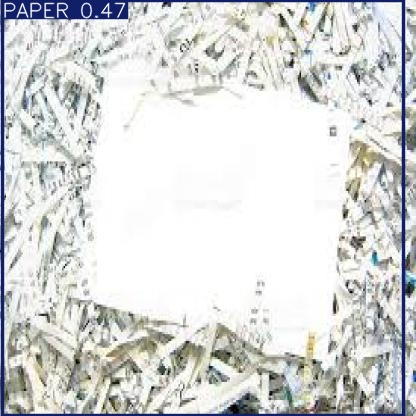

In [44]:
from ultralytics import YOLO
from IPython.display import display, HTML
import os
import base64

predict_folder = "/content/runs/detect/predict"
selected_files = [f for f in os.listdir(predict_folder) if f.endswith((".jpg", ".png"))][:14]

html = "<div style='display: flex; flex-wrap: wrap;'>"

for img_file in selected_files:
    img_path = os.path.join(predict_folder, img_file)

    # Base64 encode
    with open(img_path, "rb") as img_f:
        img_base64 = base64.b64encode(img_f.read()).decode("utf-8")

    # Predict
    result = model.predict(source=img_path, conf=0.4, save=False)[0]
    labels = []
    for box in result.boxes:
        cls_id = int(box.cls[0])
        class_name = result.names[cls_id]
        conf = float(box.conf[0])
        labels.append(f"{class_name.upper()} ({conf:.2f})")
    label_html = "<br>".join(labels)

    # HTML kutusu
    html += f"""
        <div style='margin: 10px; text-align: center;'>
            <img src='data:image/jpeg;base64,{img_base64}' width='200'><br>
            <strong>{img_file}</strong><br>
            {label_html}
        </div>
    """

html += "</div>"
display(HTML(html))


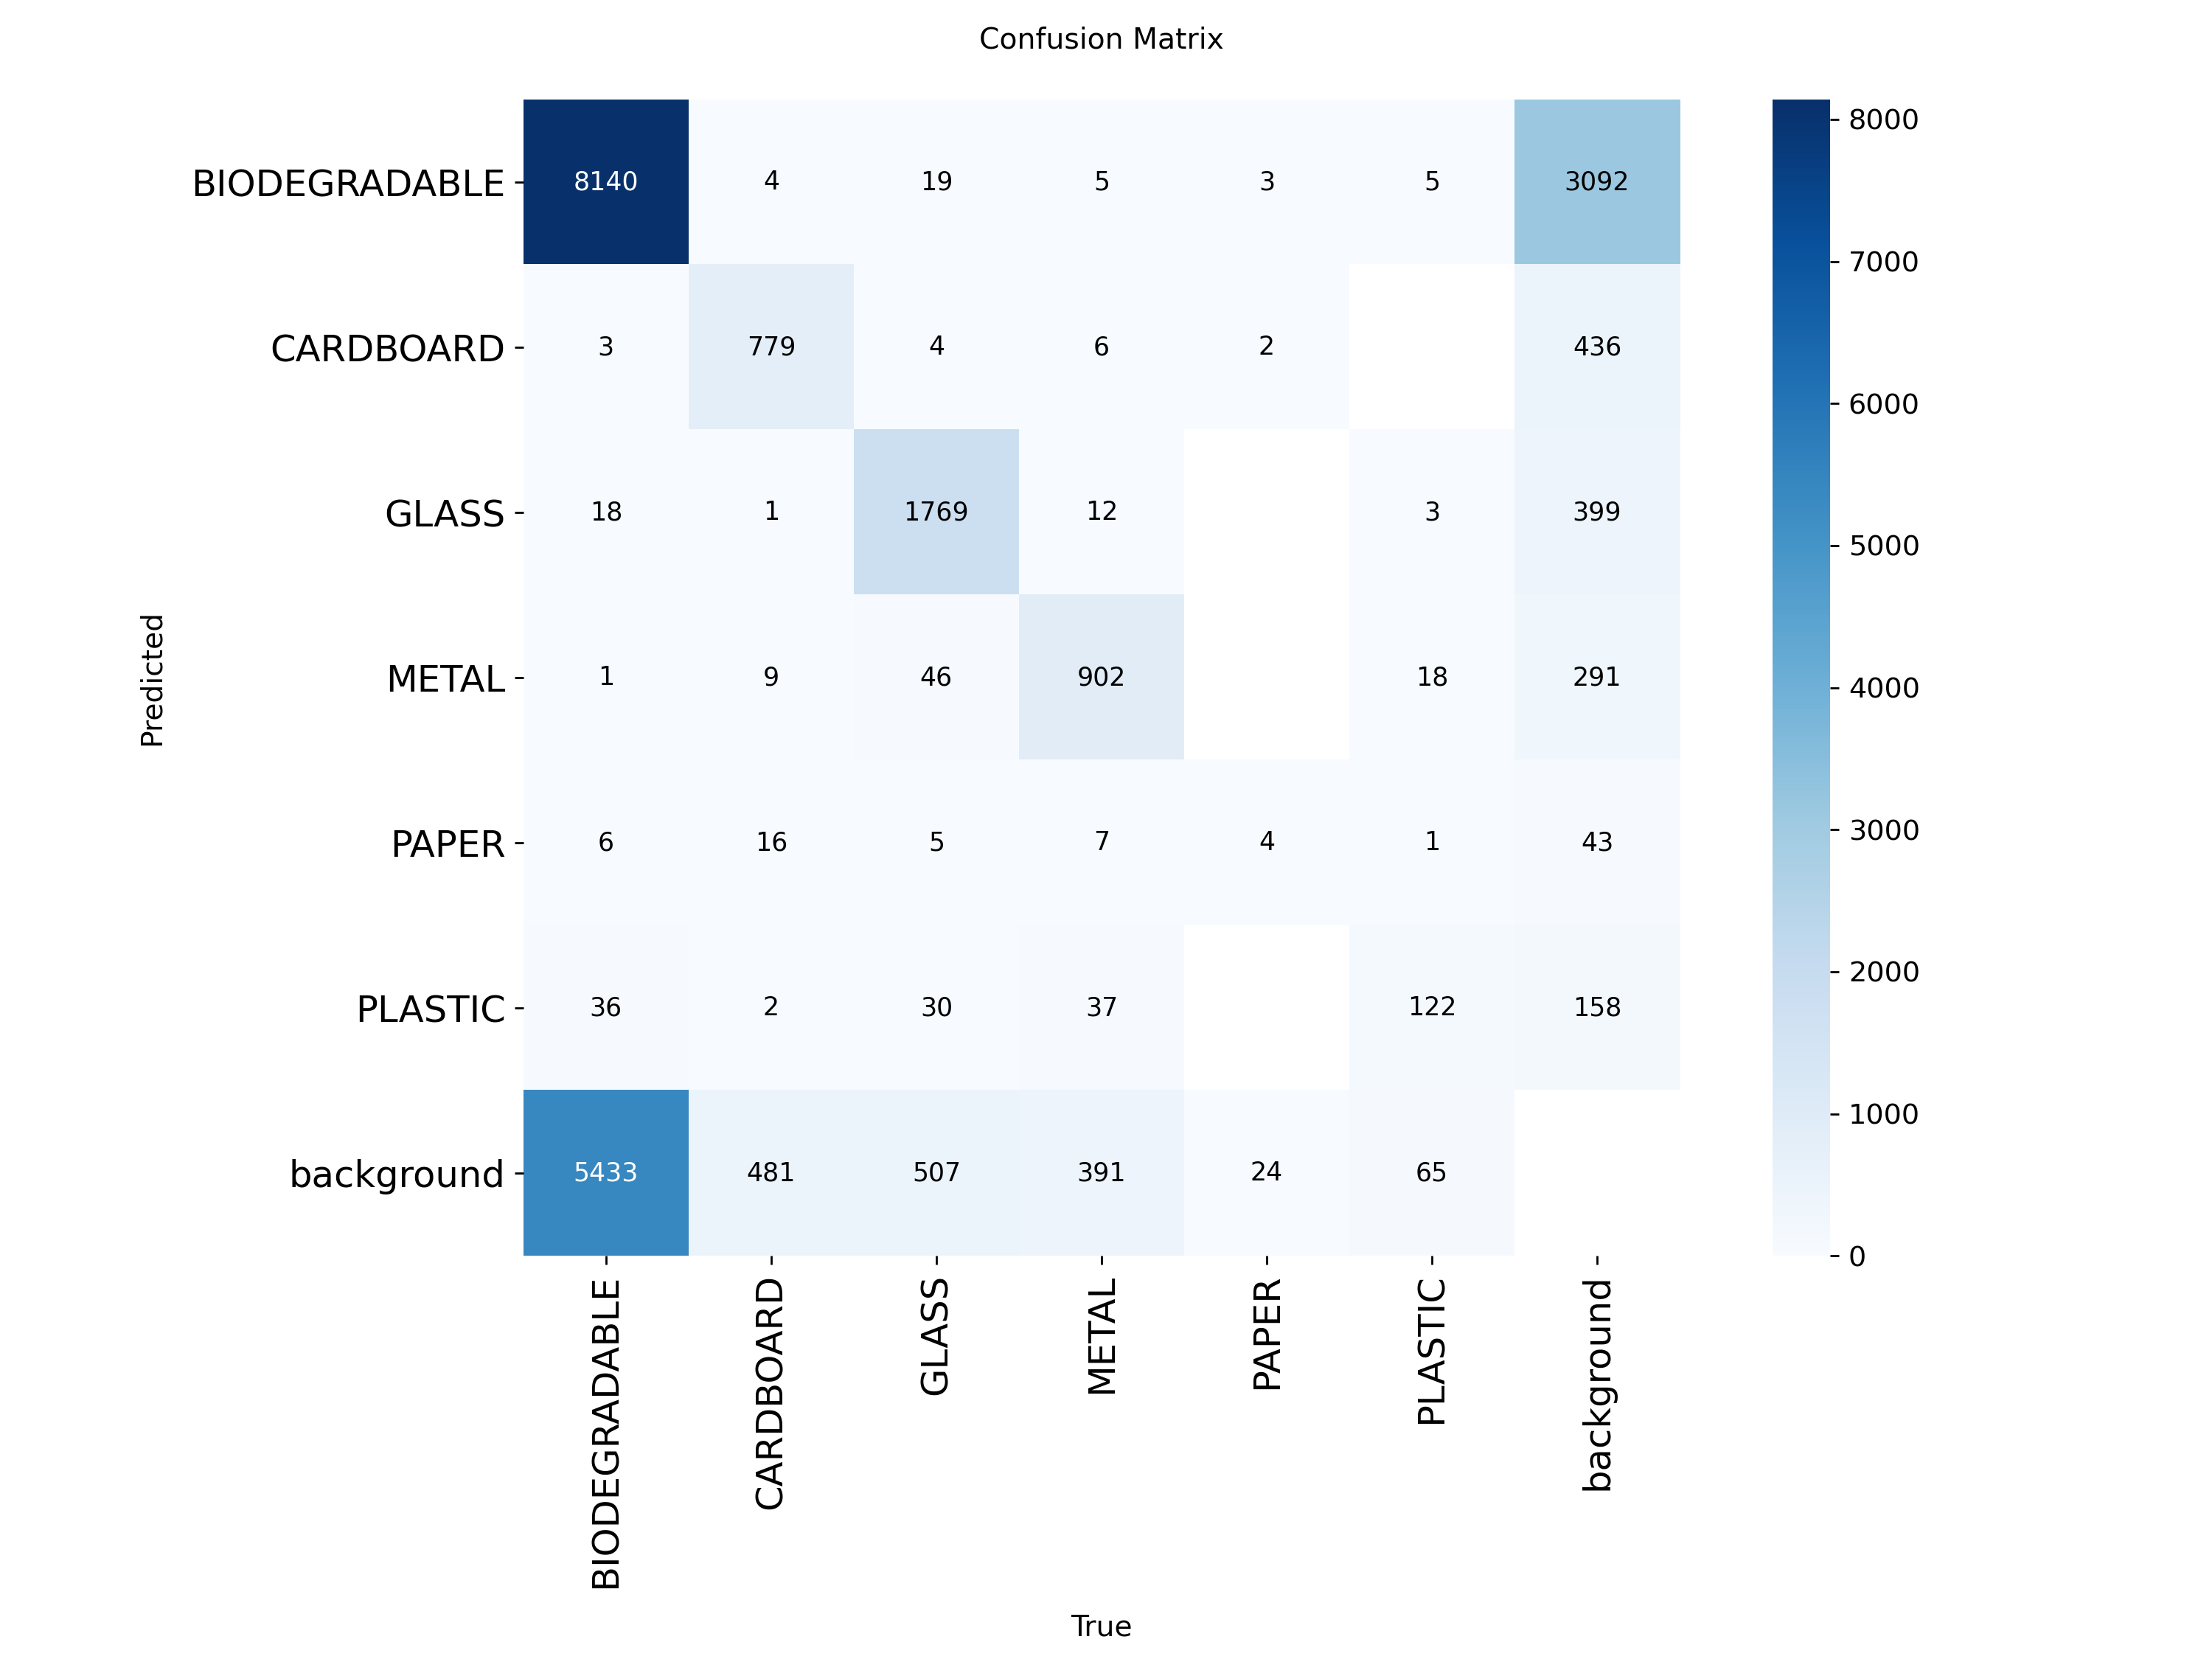

In [47]:
# Eğer model.val daha önce çalıştırıldıysa:
from IPython.display import Image
Image(filename='runs/detect/val/confusion_matrix.png')
